In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from upsetplot import UpSet, from_contents, plot, from_indicators
import pandas as pd

In [2]:
# split gene for Pse
def splitgene(gene):
    xxx = gene.split('-')
    if len(xxx) == 1 :
        return xxx[0]
    elif len(xxx)==2 :
        return xxx[1]
    else:
        xxxx = ''
        for i in range(1,len(xxx)):
            xxxx = xxxx+xxx[i]
            if i != len(xxx)-1:
                xxxx = xxxx + '-'
        return xxxx

def AddOne2One(inmarker,One2One,prefix):
    One2One = pd.read_csv(One2One,sep='\t',header=None)
    One2One.columns = ['us','Symbol','idy']
    One2One['us1'] = One2One.apply(lambda row: row['us'].replace('_','-'),axis=1)
    One2One['us'] =  One2One['us1']
    def getSymbol(gene):
        xx = One2One[One2One['us']== gene]['Symbol'].to_list()
        if len(xx) < 1 :
            return gene
            #return 'NA'
        else:
            return xx[0]
    
    inmarker[prefix] = inmarker.apply(lambda row: getSymbol(row['gene']),axis=1)
    return inmarker

def MapGene(inmarker,mapfile,prefix):
    mapper = pd.read_csv(mapfile,sep='\t',header=0)
    mapper['merge.gene'] = mapper.apply(lambda row: row['merge.gene'].replace('_','-'),axis=1)
    mapper['merge.gene2'] = mapper.apply(lambda row: row['merge.gene2'].replace('_','-'),axis=1)
    mapper = mapper.set_index('merge.gene')

    inmarker = inmarker.set_index('gene')
    inmarker[prefix] = mapper['merge.gene2']
    return inmarker

def GetOMMakers(mfile,one2one,prefix,split=False,lfct=1.2):
    inmarker = pd.read_csv(mfile,sep='\t',header=0)
    inmarker = inmarker[inmarker['avg_log2FC']>=lfct].copy()
    inmarker = MapGene(inmarker,one2one,prefix)
    return inmarker
def GetOMMakers_HM(mfile,one2one,prefix,split=False,lfct=1.2):
    inmarker = pd.read_csv(mfile,sep='\t',header=0)
    inmarker[prefix] = inmarker['gene']
    return inmarker

def GetAll10_Marker(lfct=0.2):
    ret = {}
    ret['Ome.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Oryzias_melastigma_intestine.AllMarkers.csv', 'D:/test_1/hotspot/one2one/one2one2.0/01.Oryzias_melastigma_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)
    ret['Ome.D'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Oryzias_melastigma_stomach.AllMarkers.csv',       'D:/test_1/hotspot/one2one/one2one2.0/01.Oryzias_melastigma_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)

    ret['Mat.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Megalops_atlanticus_intestine.AllMarkers.csv',     'D:/test_1/hotspot/one2one/one2one2.0/02.Megalops_atlanticus_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)
    ret['Mat.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Megalops_atlanticus_stomach.AllMarkers.csv',      'D:/test_1/hotspot/one2one/one2one2.0/02.Megalops_atlanticus_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)

    ret['Psp.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polyodon_spathula_intestine.AllMarkers.csv',        'D:/test_1/hotspot/one2one/one2one2.0/03.Polyodon_spathula_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)
    ret['Psp.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polyodon_spathula_stomach.AllMarkers.csv',        'D:/test_1/hotspot/one2one/one2one2.0/03.Polyodon_spathula_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)


    ret['Pan.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Protopterus_annectens_intestine.AllMarkers.csv',    'D:/test_1/hotspot/one2one/one2one2.0/04.Protopterus_annectens_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct) 
    ret['Pan.D'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Protopterus_annectens_stomach.AllMarkers.csv',    'D:/test_1/hotspot/one2one/one2one2.0/04.Protopterus_annectens_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct) 

    ret['Pse.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polypterus_senegalus_intestine.AllMarkers.csv',     'D:/test_1/hotspot/one2one/one2one2.0/05.Polypterus_senegalus_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)
    ret['Pse.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polypterus_senegalus_stomach.AllMarkers.csv',      'D:/test_1/hotspot/one2one/one2one2.0/05.Polypterus_senegalus_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)

    ret['Cpl.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Chiloscyllium_plagiosum_intestine.AllMarkers.csv',   'D:/test_1/hotspot/one2one/one2one2.0/06.Chiloscyllium_plagiosum_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)
    ret['Cpl.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Chiloscyllium_plagiosum_stomach.AllMarkers.csv',    'D:/test_1/hotspot/one2one/one2one2.0/06.Chiloscyllium_plagiosum_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)

    ret['Lja.G'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Lampetra_japonica_intestine.AllMarkers.csv',        'D:/test_1/hotspot/one2one/one2one2.0/07.Lampetra_japonica_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)

    ret['Pbu.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Pantodon_buchholzi_intestine.AllMarkers.csv',       'D:/test_1/hotspot/one2one/one2one2.0/08.Pantodon_buchholzi_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)
    ret['Pbu.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Pantodon_buchholzi_stomach.AllMarkers.csv',       'D:/test_1/hotspot/one2one/one2one2.0/08.Pantodon_buchholzi_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv' ,'ZB',lfct=lfct)

    ret['Asp.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Atractosteus_spatula_intestine.AllMarkers.csv',    'D:/test_1/hotspot/one2one/one2one2.0/09.Atractosteus_spatula_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv' ,'ZB',lfct=lfct)
    ret['Asp.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Atractosteus_spatula_stomach.AllMarkers.csv',    'D:/test_1/hotspot/one2one/one2one2.0/09.Atractosteus_spatula_stomach.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv' ,'ZB',lfct=lfct)

    ret['Hsa.I'] = GetOMMakers_HM('D:/test_1/hotspot/cross_markers/celltype/Homo_sapiens_intestine.AllMarkers.csv',  'D:/test_1/hotspot/one2one/one2one2.0/09.Atractosteus_spatula_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)
    ret['Hsa.S'] = GetOMMakers_HM('D:/test_1/hotspot/cross_markers/celltype/Homo_sapiens_stomach.AllMarkers.csv',  'D:/test_1/hotspot/one2one/one2one2.0/09.Atractosteus_spatula_intestine.anno.re-assign.epi.imm2.scVI.FN1.h5ad.var.csv','ZB',lfct=lfct)

    return ret

def CollectMarker(inmdata, klist,kk='ZB'):
    return list(set(inmdata[inmdata['cluster'].isin(klist)][kk].to_list()))

def CollectAllMarker(inmdata, klist,kk='ZB'):
    return list(set(inmdata[kk].to_list()))

In [4]:
def GetOMMakers(mfile,prefix,lfct=1.2):
    inmarker = pd.read_csv(mfile,sep='\t',header=0)
    inmarker = inmarker[inmarker['avg_log2FC']>=lfct].copy()
    inmarker[prefix] = inmarker['gene']
    return inmarker

def GetAll10_Marker(lfct=0.2):
    ret = {}
    ret['Ome.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Oryzias_melastigma_intestine.AllMarkers.csv','ZB',lfct=lfct)
    ret['Ome.D'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Oryzias_melastigma_stomach.AllMarkers.csv','ZB',lfct=lfct)

    ret['Mat.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Megalops_atlanticus_intestine.AllMarkers.csv','ZB',lfct=lfct)
    ret['Mat.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Megalops_atlanticus_stomach.AllMarkers.csv','ZB',lfct=lfct)

    ret['Psp.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polyodon_spathula_intestine.AllMarkers.csv','ZB',lfct=lfct)
    ret['Psp.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polyodon_spathula_stomach.AllMarkers.csv','ZB',lfct=lfct)


    ret['Pan.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Protopterus_annectens_intestine.AllMarkers.csv','ZB',lfct=lfct) 
    ret['Pan.D'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Protopterus_annectens_stomach.AllMarkers.csv','ZB',lfct=lfct) 

    ret['Pse.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polypterus_senegalus_intestine.AllMarkers.csv','ZB',lfct=lfct)
    ret['Pse.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Polypterus_senegalus_stomach.AllMarkers.csv','ZB',lfct=lfct)

    ret['Cpl.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Chiloscyllium_plagiosum_intestine.AllMarkers.csv','ZB',lfct=lfct)
    ret['Cpl.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Chiloscyllium_plagiosum_stomach.AllMarkers.csv','ZB',lfct=lfct)

    ret['Lja.G'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Lampetra_japonica_intestine.AllMarkers.csv','ZB',lfct=lfct)

    ret['Pbu.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Pantodon_buchholzi_intestine.AllMarkers.csv','ZB',lfct=lfct)
    ret['Pbu.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Pantodon_buchholzi_stomach.AllMarkers.csv', 'ZB',lfct=lfct)

    ret['Asp.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Atractosteus_spatula_intestine.AllMarkers.csv', 'ZB',lfct=lfct)
    ret['Asp.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Atractosteus_spatula_stomach.AllMarkers.csv', 'ZB',lfct=lfct)

    ret['Hsa.I'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Homo_sapiens_intestine.AllMarkers.csv', 'ZB',lfct=lfct)
    ret['Hsa.S'] = GetOMMakers('D:/test_1/hotspot/cross_markers/celltype/Homo_sapiens_stomach.AllMarkers.csv','ZB',lfct=lfct)

    return ret

def CollectMarker(inmdata, klist,kk='ZB'):
    return list(set(inmdata[inmdata['cluster'].isin(klist)][kk].to_list()))

def CollectAllMarker(inmdata, klist,kk='ZB'):
    return list(set(inmdata[kk].to_list()))

In [5]:
allmarker0_2 = GetAll10_Marker(0.2)

In [6]:
JoinAllMarkers = {
    'drawer':{},
    'mapper' : {},
    'counter' : {},
}
def SetJoinMarkers(Name,indicators_df):
    import numpy as np
    JoinAllMarkers['drawer'][Name] = indicators_df
    JoinAllMarkers['mapper'][Name] = indicators_df.reset_index().set_index('id')
    sss = JoinAllMarkers['mapper'][Name] .sum(axis=1).reset_index()
    sss.columns = ['gene','count']
    sss['type'] = Name
    JoinAllMarkers['counter'][Name] =  sss

def GetJointMarkers(Name, threshold):
    tmp = JoinAllMarkers['counter'][Name]
    return tmp[tmp['count']>=threshold]['gene'].to_list()

In [7]:
def GetTotalCommonMarker(allmarker,Name,min_degree_to_show):
    ctlist=[]
    Ome_I = CollectAllMarker(allmarker['Ome.I'],ctlist)
    Ome_D = CollectAllMarker(allmarker['Ome.D'],ctlist)

    Mat_I = CollectAllMarker(allmarker['Mat.I'],ctlist)
    Mat_S = CollectAllMarker(allmarker['Mat.S'],ctlist)


    Psp_S = CollectAllMarker(allmarker['Psp.S'],ctlist)
    Psp_I = CollectAllMarker(allmarker['Psp.I'],ctlist)   

    Pan_D = CollectAllMarker(allmarker['Pan.D'],ctlist)
    Pan_I = CollectAllMarker(allmarker['Pan.I'],ctlist)

    Pse_S = CollectAllMarker(allmarker['Pse.S'],ctlist)
    Pse_I = CollectAllMarker(allmarker['Pse.I'],ctlist)   

    Cpl_I = CollectAllMarker(allmarker['Cpl.I'],ctlist)
    Cpl_S = CollectAllMarker(allmarker['Cpl.S'],ctlist)

    Lja_G = CollectAllMarker(allmarker['Lja.G'],ctlist)   

    Asp_I = CollectAllMarker(allmarker['Asp.I'],ctlist)
    Asp_S = CollectAllMarker(allmarker['Asp.S'],ctlist)

    Pbu_I = CollectAllMarker(allmarker['Pbu.I'],ctlist)
    Pbu_S = CollectAllMarker(allmarker['Pbu.S'],ctlist)   
    
    Hsa_I = CollectAllMarker(allmarker['Hsa.I'],ctlist)
    Hsa_S = CollectAllMarker(allmarker['Hsa.S'],ctlist)  
    
    
    stastic_intersection = {

        'Ome_I':Ome_I,
        'Ome_D':Ome_D,

        'Mat.I':Mat_I,  
        'Mat.S':Mat_S,  
        
        'Psp.I':Psp_I,
        'Psp.S':Psp_S,
        
        'Pan.I':Pan_I,
        'Pan.D':Pan_D,

        'Pse.S':Pse_S,
        'Pse.I':Pse_I,

        'Cpl.S':Cpl_S,
        'Cpl.I':Cpl_I,

        'Lja.G':Lja_G,

        'Pbu.S':Pbu_S,
        'Pbu.I':Pbu_I,
        
        'Asp.I':Asp_I,
        'Asp.S':Asp_S,

        'Hsa.I':Hsa_I,
        'Hsa.S':Hsa_S,
 
    }
    indicators_df=from_contents(stastic_intersection)
    SetJoinMarkers(Name,indicators_df)
    upset=UpSet(indicators_df, sort_by='degree',min_degree=min_degree_to_show, subset_size='auto', show_counts=True,orientation='vertical',)
    upset.style_subsets(min_degree=19, facecolor="blue")
    upset.plot()
    plt.title(Name)

e:\anaconda\Lib\site-packages\upsetplot\data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
e:\anaconda\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
e:\anaconda\Lib\site-packages\upset

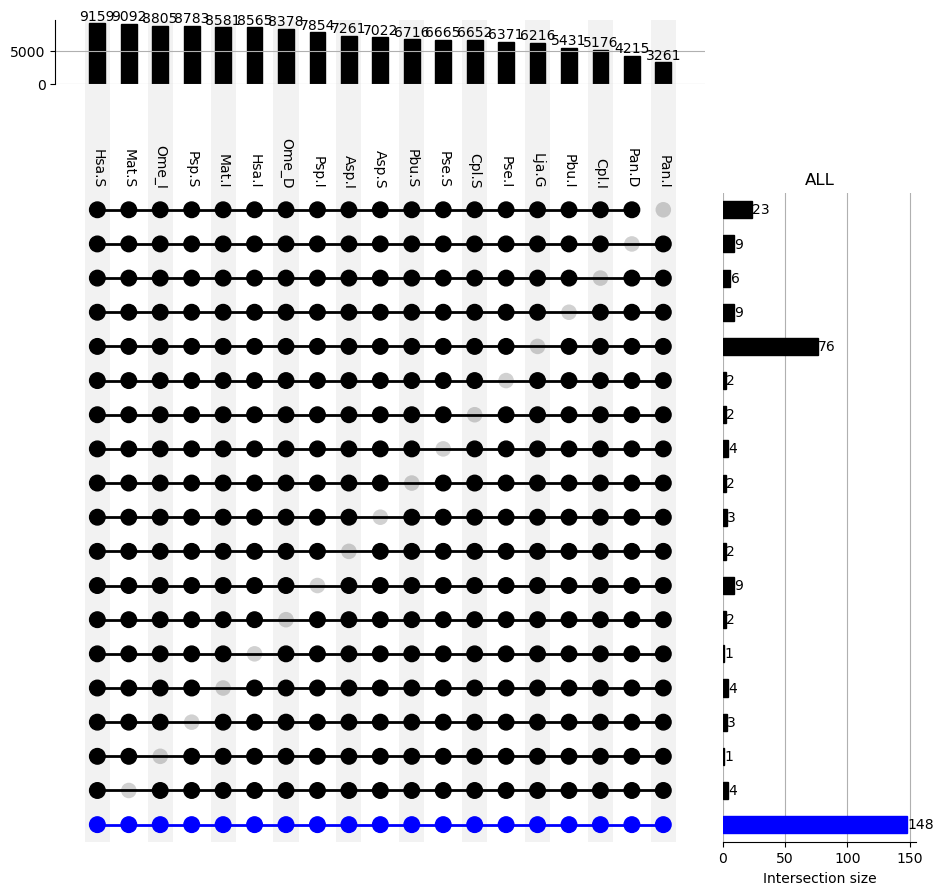

In [8]:
GetTotalCommonMarker(allmarker0_2,'ALL',18)

In [9]:
JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=19]['gene'].to_list()

['YWHAG',
 'RPSA',
 'PRDX1',
 'DDX21',
 'NUDC',
 'PIK3R1',
 'RPS2',
 'SAT1',
 'APP',
 'NSA2',
 'RACK1',
 'RPS15',
 'RBX1',
 'ATP6V1E1',
 'RPS26',
 'ARL1',
 'FAU',
 'CAPRIN1',
 'QDPR',
 'LAPTM4A',
 'ATP6V0C',
 'RPS4X',
 'MBNL1',
 'EZR',
 'COX6B1',
 'SWAP70',
 'ITGB1',
 'PKM',
 'RPL19',
 'RPL35',
 'PFN2',
 'CALM1',
 'GSTO1',
 'ALDH2',
 'ADH5',
 'CALR',
 'ACTB',
 'NDUFB2',
 'HEXB',
 'RPS15A',
 'ARPC2',
 'CTSD',
 'RPS6',
 'RPL34',
 'HMGB1',
 'RPS27',
 'RPL7',
 'RPL37A',
 'GRN',
 'AHCY',
 'PLIN2',
 'FERMT2',
 'ATP5PD',
 'SERPINE2',
 'RPS28',
 'EPB41L2',
 'HMGB2',
 'SMAD1',
 'RPL31',
 'ARPC1B',
 'RPS23',
 'SERBP1',
 'ARPC3',
 'RPL18A',
 'CSRP1',
 'ADD1',
 'ATP5F1B',
 'AKAP9',
 'SPARC',
 'FSTL1',
 'RPLP1',
 'PTPRC',
 'ACTR3',
 'PSMB3',
 'SPTAN1',
 'PRDX6',
 'LGMN',
 'RPS7',
 'THRAP3',
 'COX6C',
 'VGLL4',
 'MDH2',
 'RGS3',
 'RPL5',
 'RPL24',
 'RPLP0',
 'TNIP1',
 'HSPD1',
 'PEPD',
 'HSP90AA1',
 'CAP1',
 'VCP',
 'ARPC4',
 'RPL7A',
 'PABPC1',
 'RPL4',
 'TPD52L2',
 'RPLP2',
 'GSN',
 'TPT1',
 'DBI'

In [7]:
len(JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=10]['gene'].to_list())

3893

In [12]:
len(JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=7]['gene'].to_list())

6407

In [36]:
len(JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=4]['gene'].to_list())

9919

In [8]:
len(set(JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=5]['gene'].to_list()))

8736

In [11]:
len(JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=6]['gene'].to_list())

7645

In [10]:
JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=5].to_csv('D:/test_1/GT5.csv',sep='\t',header=True,index=False)

In [45]:
len(JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=3]['gene'].to_list())

11356

In [47]:
check=[
'SMAD9', 
'ANGPTL3',
'ATP4A',
'MFSD4A',
'FABP3',
'ESRRG',
'ATP4B',
'CKB',
'IDH2',
'SLC16A7',
'PGA3',
'HRH2',
'TMED6',
'NUPR1',
'CHIA',
'PGC',
'LYZ',
'OXR1',
'CLCN2',
'SLC2A4',
'RAI14',
'LDHB',
'MB',
'PPARGC1A',
]

def checkN(n=6):
    commMK = JoinAllMarkers['counter']['ALL'][JoinAllMarkers['counter']['ALL']['count']>=n]['gene'].to_list()
    N=0
    ccc=[]
    for x in check:
        if x in commMK:
            N=N+1
        else:
            ccc.append(x)
    print(N)
    print(ccc)

In [50]:
checkN(5)

22
['ANGPTL3', 'SLC2A4']


In [43]:
checkN(2)

24


In [54]:
checkN(3)

23
['ANGPTL3']


In [39]:
checkN(4)

22


In [57]:
checkN(6)

20
['ANGPTL3', 'HRH2', 'TMED6', 'SLC2A4']


In [40]:
checkN(6)

20


In [8]:
def GetAllCommonMarker(allmarker,Name,ctlist,min_degree_to_show):
    Ome_I = CollectMarker(allmarker['Ome.I'],ctlist)
    Ome_D = CollectMarker(allmarker['Ome.D'],ctlist)

    Mat_I = CollectMarker(allmarker['Mat.I'],ctlist)
    Mat_S = CollectMarker(allmarker['Mat.S'],ctlist)

    Psp_S = CollectMarker(allmarker['Psp.S'],ctlist)
    Psp_I = CollectMarker(allmarker['Psp.I'],ctlist)   

    Pan_D = CollectMarker(allmarker['Pan.D'],ctlist)
    Pan_I = CollectMarker(allmarker['Pan.I'],ctlist)

    Pse_S = CollectMarker(allmarker['Pse.S'],ctlist)
    Pse_I = CollectMarker(allmarker['Pse.I'],ctlist)   

    Cpl_I = CollectMarker(allmarker['Cpl.I'],ctlist)
    Cpl_S = CollectMarker(allmarker['Cpl.S'],ctlist)

    Lja_G = CollectMarker(allmarker['Lja.G'],ctlist)   

    Asp_I = CollectMarker(allmarker['Asp.I'],ctlist)
    Asp_S = CollectMarker(allmarker['Asp.S'],ctlist)

    Pbu_I = CollectMarker(allmarker['Pbu.I'],ctlist)
    Pbu_S = CollectMarker(allmarker['Pbu.S'],ctlist)   
    
    Hsa_I = CollectMarker(allmarker['Hsa.I'],ctlist)
    Hsa_S = CollectMarker(allmarker['Hsa.S'],ctlist)  
    
    
    stastic_intersection = {

        'Ome_I':Ome_I,
        'Ome_D':Ome_D,

        'Mat.I':Mat_I,  
        'Mat.S':Mat_S,  
        
        'Psp.I':Psp_I,
        'Psp.S':Psp_S,
        
        'Pan.I':Pan_I,
        'Pan.D':Pan_D,

        'Pse.S':Pse_S,
        'Pse.I':Pse_I,

        'Cpl.S':Cpl_S,
        'Cpl.I':Cpl_I,

        'Lja.G':Lja_G,

        'Pbu.S':Pbu_S,
        'Pbu.I':Pbu_I,
        
        'Asp.I':Asp_I,
        'Asp.S':Asp_S,

        'Hsa.I':Hsa_I,
        'Hsa.S':Hsa_S,
 
    }
    indicators_df=from_contents(stastic_intersection)
    SetJoinMarkers(Name,indicators_df)
    upset=UpSet(indicators_df, sort_by='degree',min_degree=min_degree_to_show, subset_size='auto', show_counts=True,orientation='vertical',)
    upset.style_subsets(min_degree=19, facecolor="blue")
    upset.plot()
    plt.title(Name)

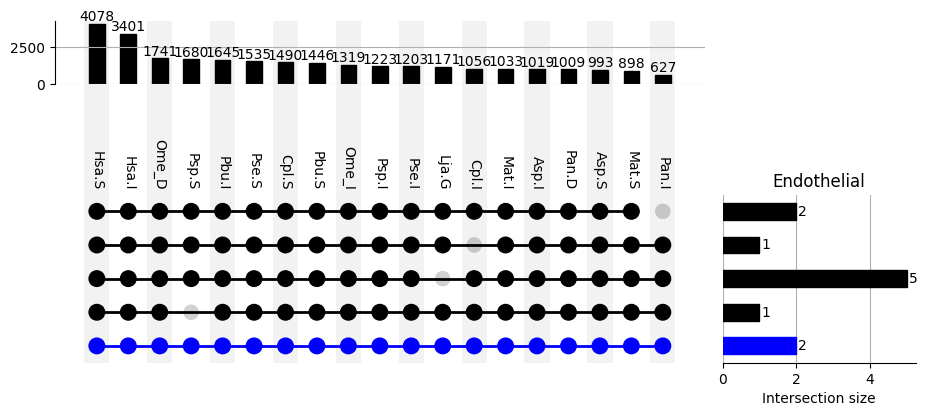

In [21]:
GetAllCommonMarker(allmarker0_2,'Endothelial',['Vascular_endothelia','Lymphatic_endothelia', 'Cycling_endothelia','Endothelial'],18)

In [19]:
JoinAllMarkers['counter']['Endothelial'][JoinAllMarkers['counter']['Endothelial']['count']>=19]['gene'].to_list()

['FERMT2', 'SMAD1']

In [20]:
JoinAllMarkers['counter']['Endothelial'][JoinAllMarkers['counter']['Endothelial']['count']>=18]['gene'].to_list()

['PTPRB',
 'FERMT2',
 'CD81',
 'SPTBN1',
 'TIE1',
 'PLK2',
 'PLXND1',
 'SMAD1',
 'ADGRL4',
 'SOCS3',
 'VGLL4']

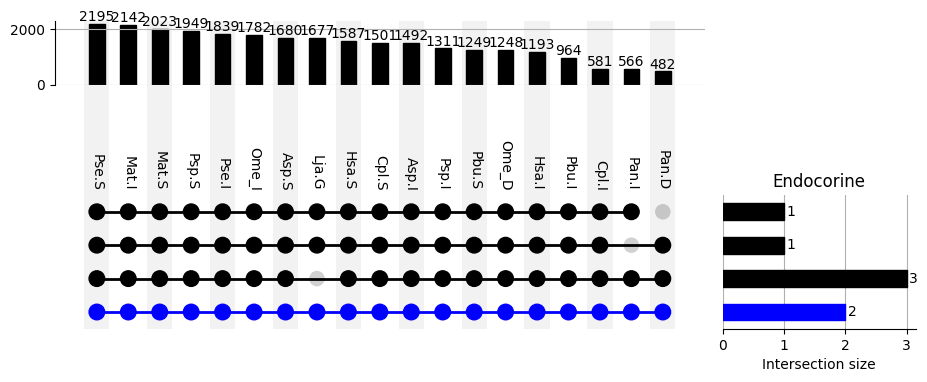

In [9]:
GetAllCommonMarker(allmarker0_2,'Endocorine',['Endocorine','Enteroendocrine','Neuroendocrine'],18)

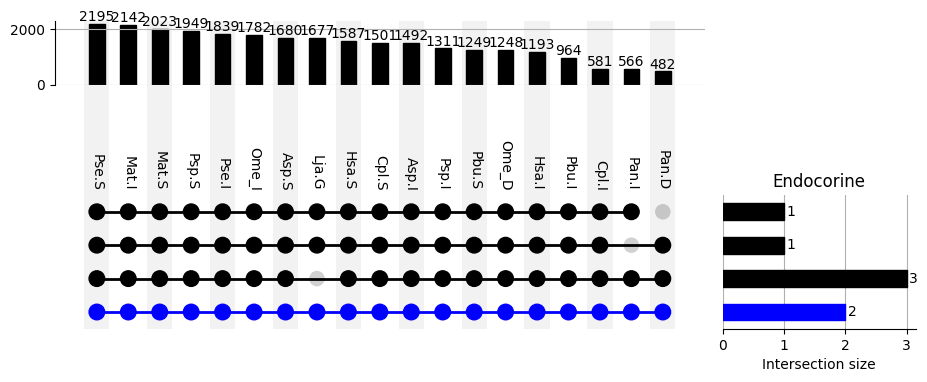

In [32]:
GetAllCommonMarker(allmarker0_2,'Endocorine',['Endocorine','Enteroendocrine','Neuroendocrine'],18)

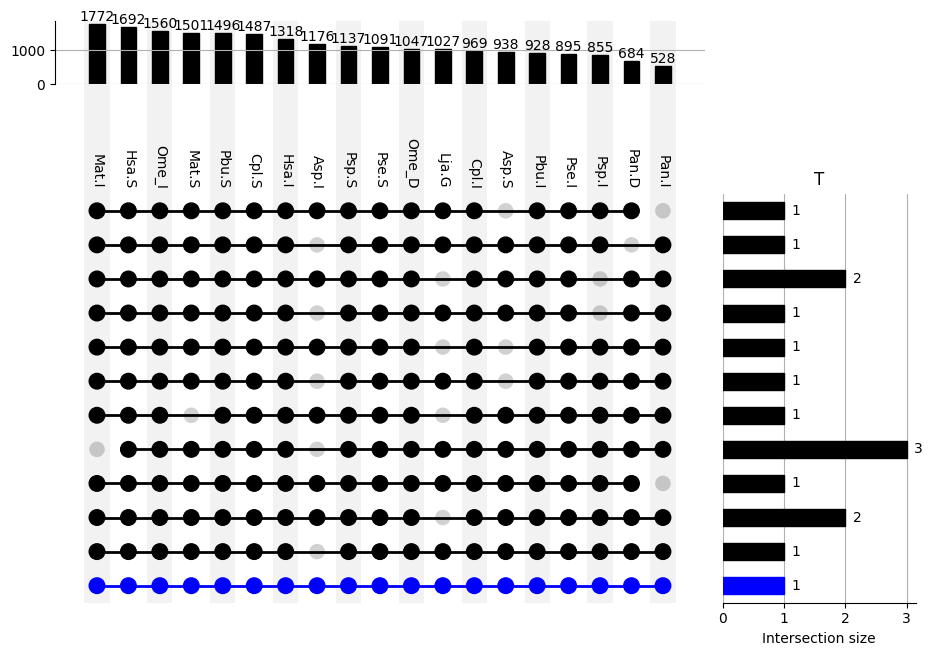

In [28]:
GetAllCommonMarker(allmarker0_2,'T',['T cells','T-like','T and NK cells'],17)

In [27]:
JoinAllMarkers['counter']['Endocorine'][JoinAllMarkers['counter']['Endocorine']['count']>=19]['gene'].to_list()

['SCGN', 'CPE']

In [22]:
JoinAllMarkers['counter']['Endocorine'][JoinAllMarkers['counter']['Endocorine']['count']>=18]['gene'].to_list()

KeyError: 'Endocorine'

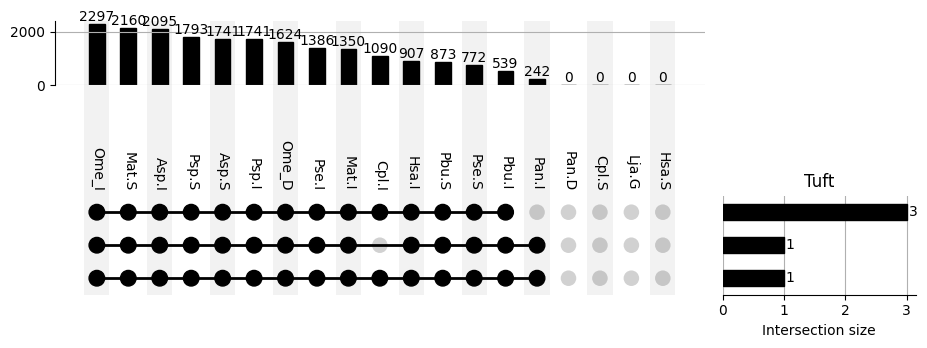

In [36]:
GetAllCommonMarker(allmarker0_2,'Tuft',['Tuft'],14)

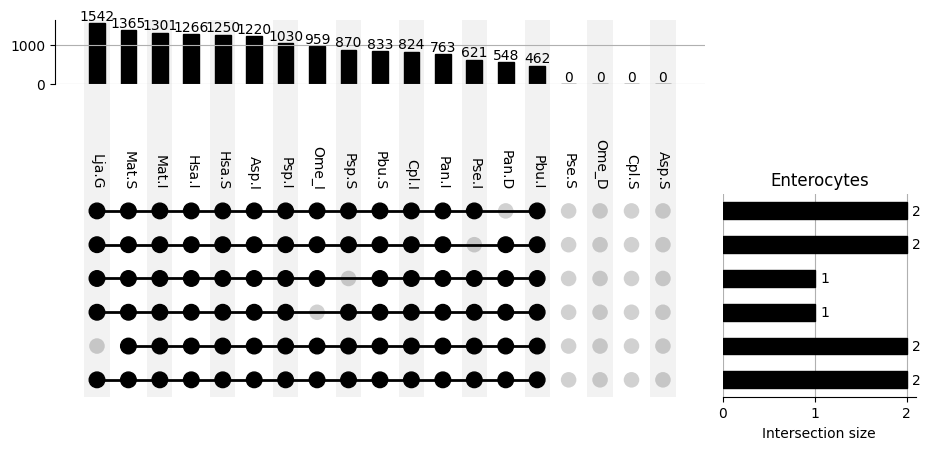

In [41]:
GetAllCommonMarker(allmarker0_2,'Enterocytes',['Enterocytes','Enterocyte'],14)

In [42]:
JoinAllMarkers['counter']['Enterocytes'][JoinAllMarkers['counter']['Enterocytes']['count']>=15]['gene'].to_list()

['SLC15A1', 'ANPEP']

In [ ]:
JoinAllMarkers['counter']['Enterocytes'][JoinAllMarkers['counter']['Endocorine']['count']>=18]['gene'].to_list()

In [7]:
def GetCiliatedCommonMarker(allmarker,Name,ctlist,min_degree_to_show):
    Psp_S = CollectMarker(allmarker['Psp.S'],ctlist)
    Pse_S = CollectMarker(allmarker['Pse.S'],ctlist)
    Mat_S = CollectMarker(allmarker['Mat.S'],ctlist)
    Asp_S = CollectMarker(allmarker['Asp.S'],ctlist)
    Cpl_S = CollectMarker(allmarker['Cpl.S'],ctlist)
    Pan_D = CollectMarker(allmarker['Pan.D'],ctlist)
    Lja_G = CollectMarker(allmarker['Lja.G'],ctlist)   
    Psp_I = CollectMarker(allmarker['Psp.I'],ctlist)   
    Pse_I = CollectMarker(allmarker['Pse.I'],ctlist)   
    Pan_I = CollectMarker(allmarker['Pan.I'],ctlist)

    stastic_intersection = {
        'Pse.S':Pse_S,
        'Mat.S':Mat_S,
        'Asp.S':Asp_S,
        'Cpl.S':Cpl_S,
        'Pan.D':Pan_D,
        'Lja.G':Lja_G,
        'Psp.I':Psp_I,
        'Psp.S':Psp_S,
        'Pse.I':Pse_I,
        'Pan.I':Pan_I,
    }
    indicators_df=from_contents(stastic_intersection)
    SetJoinMarkers(Name,indicators_df)
    upset=UpSet(indicators_df, sort_by='degree',min_degree=min_degree_to_show, subset_size='auto', show_counts=True)#,orientation='vertical',)
    upset.style_subsets(min_degree=10, facecolor="blue")
    upset.plot()
    plt.title(Name)

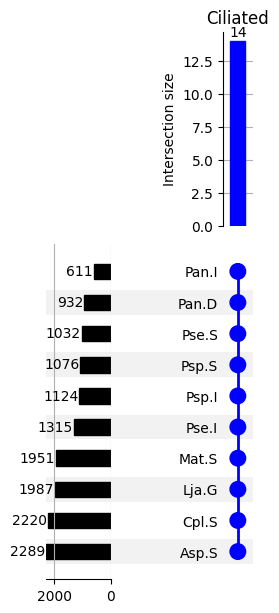

In [10]:
GetCiliatedCommonMarker(allmarker0_2,'Ciliated',['Ciliated'],10)

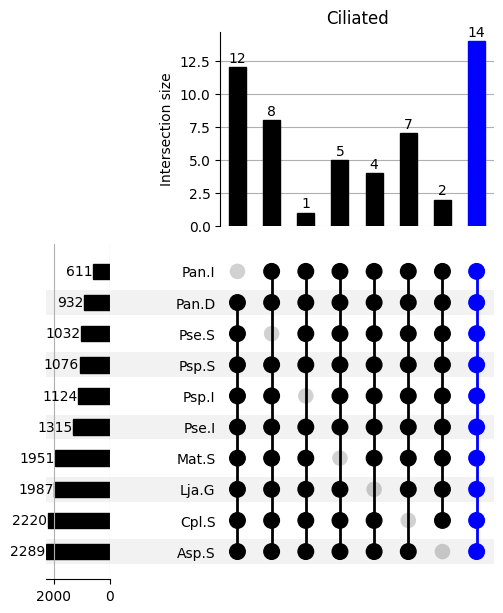

In [63]:
GetCiliatedCommonMarker(allmarker0_2,'Ciliated',['Ciliated'],9)

TypeError: object of type 'NoneType' has no len()

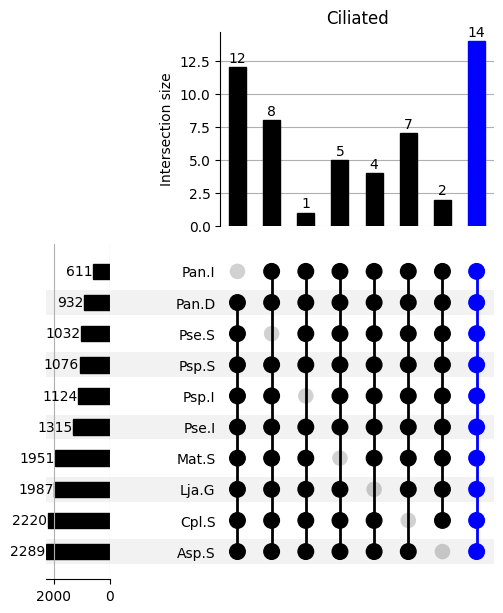

In [20]:
len(GetCiliatedCommonMarker(allmarker0_2,'Ciliated',['Ciliated'],9))

In [11]:
JoinAllMarkers['counter']['Ciliated'][JoinAllMarkers['counter']['Ciliated']['count']>=10]['gene'].to_list()

['NME7',
 'DNAI1',
 'CCDC113',
 'TRAF3IP1',
 'AK7',
 'PCM1',
 'MDM1',
 'CCDC39',
 'GAS8',
 'CCDC173',
 'ARMC3',
 'MEIG1',
 'IQCA1',
 'RSPH3']

In [21]:
len(JoinAllMarkers['counter']['Ciliated'][JoinAllMarkers['counter']['Ciliated']['count']>=9]['gene'].to_list())

53

In [13]:
xx = JoinAllMarkers['counter']['Ciliated'][JoinAllMarkers['counter']['Ciliated']['count']>=9]['gene'].to_list()
for x in xx :
    print(x)

IFT80
TPPP3
DNAH7
NME7
CFAP77
PERP
DNAI1
DNAH6
MOK
CCDC113
CCDC78
TUBB4B
CFAP58
SPEF2
RSPH1
CFAP44
SPAG17
LRRIQ1
TRAF3IP1
AK7
SYNE1
PCM1
MDM1
MAP9
CFAP54
CCDC39
MYCBPAP
AK9
GAS8
CCDC173
BBOF1
ZBBX
STARD9
ARMC3
SPAG6
SPATA18
RGS22
MEIG1
VWA3A
CFAP52
IQCA1
LRRC23
RSPH3
CCDC146
CCDC180
IFT46
CFAP20
CFAP100
DNALI1
CFAP46
IFT74
DYNC2LI1
MAATS1


In [4]:
def GetPCCommonMarker(allmarker,Name,ctlist,min_degree_to_show):
    Pse_S = CollectMarker(allmarker['Pse.S'],ctlist)
    Mat_S = CollectMarker(allmarker['Mat.S'],ctlist)
    Asp_S = CollectMarker(allmarker['Asp.S'],ctlist)
    Cpl_S = CollectMarker(allmarker['Cpl.S'],ctlist)
    Pbu_S = CollectMarker(allmarker['Pbu.S'],ctlist)
    Psp_S = CollectMarker(allmarker['Psp.S'],ctlist)
    stastic_intersection = {
        'Pse.S':Pse_S,
        'Mat.S':Mat_S,
        'Asp.S':Asp_S,
        'Cpl.S':Cpl_S,
        'Psp.S':Psp_S,
        'Pbu_S':Pbu_S,

    }
    indicators_df=from_contents(stastic_intersection)
    SetJoinMarkers(Name,indicators_df)
    upset=UpSet(indicators_df, sort_by='degree',min_degree=min_degree_to_show, subset_size='auto', show_counts=True)#,orientation='vertical',)
    upset.style_subsets(min_degree=6, facecolor="blue")
    upset.plot()
    plt.title(Name)

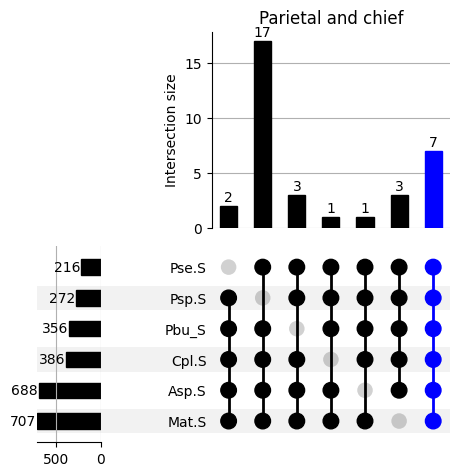

In [5]:
GetPCCommonMarker(allmarker0_2,'Parietal and chief',['Parietal and chief'],5)

In [6]:
JoinAllMarkers['counter']['Parietal and chief'][JoinAllMarkers['counter']['Parietal and chief']['count']>=6]['gene'].to_list()

['CHIA', 'ATP5MC3', 'ATP5MG', 'ESRRG', 'PGA3', 'ATP5F1A', 'IDH2']

In [7]:
JoinAllMarkers['counter']['Parietal and chief'][JoinAllMarkers['counter']['Parietal and chief']['count']>=5]['gene'].to_list()

['GAMT',
 'CHIA',
 'ATP5MC3',
 'ADH5',
 'ATP5MG',
 'ESRRG',
 'P4HB',
 'MPC2',
 'ATP5F1B',
 'SUCLG1',
 'GOT2',
 'ATP5PD',
 'VDAC2',
 'COX6C',
 'ATP4A',
 'NDUFA11',
 'ATP4B',
 'LDHB',
 'SOD2',
 'PGA3',
 'MDH2',
 'UQCRB',
 'NDUFC2',
 'GLUL',
 'NDUFB7',
 'ATP5F1A',
 'IDH2',
 'PGC',
 'MDH1',
 'COX6B1',
 'SLC25A3',
 'CKB',
 'GATA6',
 'HIP1R']

In [43]:
len(JoinAllMarkers['counter']['Parietal and chief'][JoinAllMarkers['counter']['Parietal and chief']['count']>=5]['gene'].to_list())

34

In [44]:
xx = JoinAllMarkers['counter']['Parietal and chief'][JoinAllMarkers['counter']['Parietal and chief']['count']>=3]['gene'].to_list()
for x in xx :
    print(x)

COX6C
SDHC
ETFA
NDUFV2
RPL22L1
COX7C
MPC2
ATP5PF
NIPSNAP2
NDUFV1
ESRRG
EIF4EBP3
NDUFB8
ATP5F1D
NDUFB10
COX6B1
ENO3
NDUFB7
GRWD1
PRDX3
ETFB
DDT
ATP5PD
MPP1
NDUFA8
OXA1L
SDHD
COA3
PGC
UQCRB
GOT2
SDHB
COX4I2
COX7B
P4HB
ATP5F1E
GOT1
MCRIP2
PDILT
ATP5F1B
CYCS
NDUFA6
CKB
MDH2
C19ORF70
NDUFAB1
NDUFA4
ECHS1
NDUFA13
PGA3
NDUFB11
ATP5F1C
UQCRC2
FBP1
COX5A
UQCR10
NDUFB5
MPC1
NDUFA7
ATP4A
ATP5MC3
SUCLG1
CHCHD3
HADH
SELENBP1
ANXA10
LYZ
LDHB
COX6A1
FKBP11
COX7A2L
CHIA
ATP5F1A
ATP4B
C1QBP
PHB
PDHB
ATP5MG
VDAC2
SOD2
GSTP1
GTPBP4
ATP5PO
GAMT
NDUFB9
NDUFC2
NNT
MDH1
NDUFS6
SLC25A3
ATP5PB
ADH5
NDUFA11
CDO1
CRB3
UQCRFS1
UQCR11
GLUL
NDUFB2
IDH2
LOC102724788
EIF4A2
ATP5MF
CYC1
GATA5
NDUFA5
MFSD4A
TOMM20
NDUFS8
ACAT1
NDUFB6
COX4I1
CS
NDUFA1
NDUFA10
ELOVL1
CLIC5
RPL4
NDUFS7
EIF3L
TIMM8B
NDUFA9
DDX21
EIF3D
NDUFA2
EIF5A
KIF21A
UQCRH
SLC12A2
ALDH6A1
AHCY
NDUFB3
GATA6
HIP1R
NDUFS2
PPARGC1A
FH
RGCC
UQCRQ
IRF6
VDAC3
EEF1G
BCKDHB
MECOM
DLD
NDUFS3
NDUFS5
GSTK1
SLC16A7
HSD17B10
HDLBP
ATP5ME
SAMM50
PNO1
GCAT
COX7A1
COBL

In [18]:
JoinAllMarkers['counter']['Parietal and chief'][JoinAllMarkers['counter']['Parietal and chief']['count']>=4]['gene'].to_list()

['COX6C',
 'NDUFV2',
 'RPL22L1',
 'COX7C',
 'MPC2',
 'ESRRG',
 'NDUFB8',
 'ATP5F1D',
 'NDUFB10',
 'COX6B1',
 'NDUFB7',
 'ATP5PD',
 'MPP1',
 'NDUFA8',
 'PGC',
 'UQCRB',
 'GOT2',
 'COX4I2',
 'COX7B',
 'P4HB',
 'ATP5F1E',
 'GOT1',
 'MCRIP2',
 'ATP5F1B',
 'CYCS',
 'NDUFA6',
 'CKB',
 'MDH2',
 'C19ORF70',
 'NDUFAB1',
 'ECHS1',
 'NDUFA13',
 'PGA3',
 'NDUFB11',
 'ATP5F1C',
 'UQCRC2',
 'NDUFB5',
 'MPC1',
 'NDUFA7',
 'ATP4A',
 'ATP5MC3',
 'SUCLG1',
 'HADH',
 'LYZ',
 'LDHB',
 'FKBP11',
 'COX7A2L',
 'CHIA',
 'ATP5F1A',
 'ATP4B',
 'ATP5MG',
 'VDAC2',
 'SOD2',
 'GAMT',
 'NDUFC2',
 'MDH1',
 'NDUFS6',
 'SLC25A3',
 'ATP5PB',
 'ADH5',
 'NDUFA11',
 'CDO1',
 'UQCRFS1',
 'UQCR11',
 'GLUL',
 'IDH2',
 'LOC102724788',
 'ATP5MF',
 'GATA5',
 'NDUFA5',
 'MFSD4A',
 'TIMM8B',
 'KIF21A',
 'UQCRH',
 'AHCY',
 'GATA6',
 'HIP1R',
 'UQCRQ',
 'VDAC3',
 'MECOM',
 'NDUFS3',
 'ATP5ME',
 'RNF128',
 'ATP5MD']

In [25]:
def GetCommonMarker(allmarker,Name,ctlist,min_degree_to_show):
    OMe_E = CollectMarker(allmarker['Ome'],ctlist)
    Mat_E = CollectMarker(allmarker['Mat'],ctlist)
    Psp_E = CollectMarker(allmarker['Psp'],ctlist)
    Pan_E = CollectMarker(allmarker['Pan'],ctlist)
    Pse_E = CollectMarker(allmarker['Pse'],ctlist)
    Cpl_E = CollectMarker(allmarker['Cpl'],ctlist)   
    #Lja_E = CollectMarker(allmarker['Lja'],ctlist)
    Pbu_E = CollectMarker(allmarker['Pbu'],ctlist)
    Asp_E = CollectMarker(allmarker['Asp'],ctlist)
    stastic_intersection = {
        'Ome':OMe_E,
        'Mat':Mat_E,
        'Pan':Pan_E,
        'Pse':Pse_E,
        'Psp':list(set(Psp_E)),
        'Cpl':Cpl_E,
        #'Lja':Lja_E,
        'Pbu':Pbu_E,
        'Asp':Asp_E,
    }
    indicators_df=from_contents(stastic_intersection)
    SetJoinMarkers(Name,indicators_df)
    upset=UpSet(indicators_df, sort_by='degree',min_degree=min_degree_to_show, subset_size='auto', show_counts=True)#,orientation='o',)
    upset.style_subsets(min_degree=8, facecolor="blue")

    upset.plot()
    plt.title(Name)

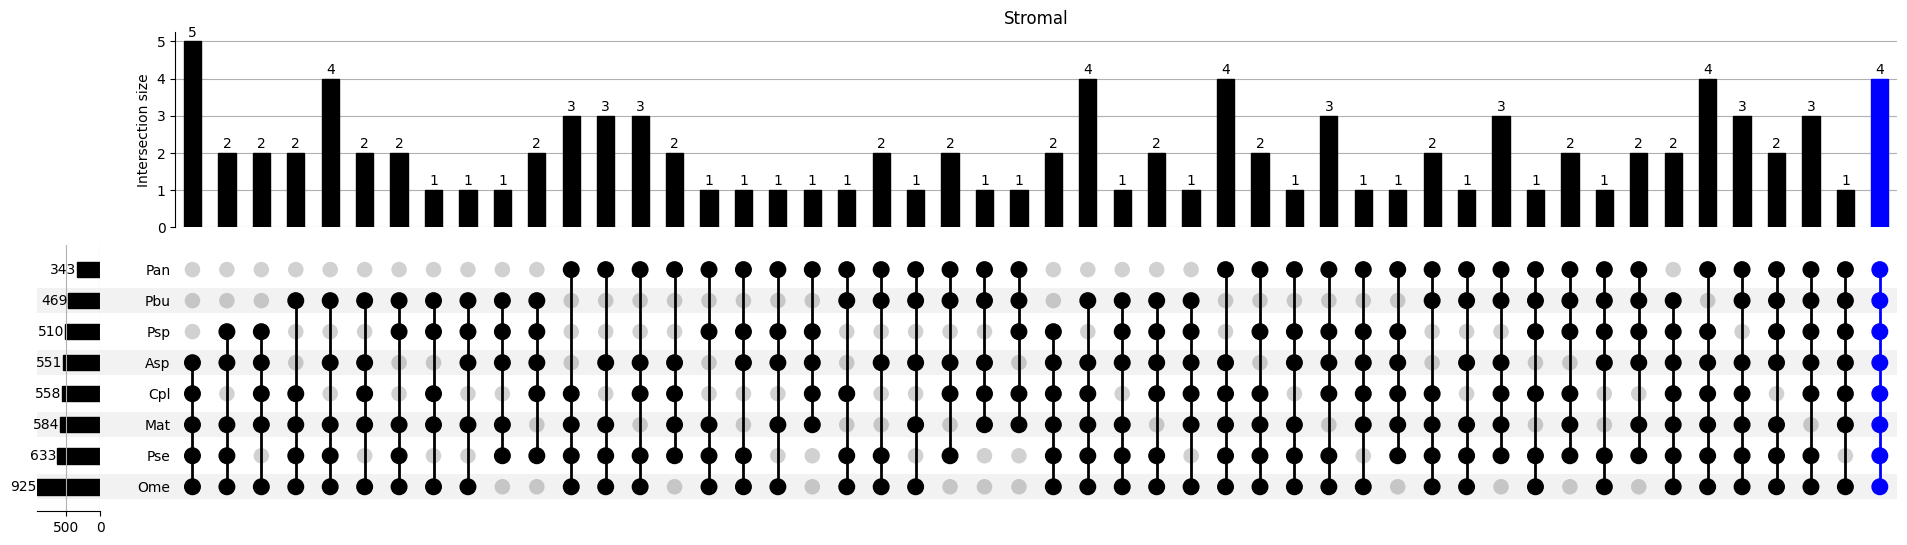

In [27]:
GetCommonMarker(allmarker0_5,'Stromal',['Stromal'],5)

In [28]:
JoinAllMarkers['counter']['Stromal'][JoinAllMarkers['counter']['Stromal']['count']>=8]

,gene,count,type
6,FSTL1,8,Stromal
65,AHNAK,8,Stromal
286,FN1,8,Stromal
860,COL1A1,8,Stromal


In [30]:
JoinAllMarkers['counter']['Stromal'][JoinAllMarkers['counter']['Stromal']['count']>=7].sort_values('count')

,gene,count,type
527,CDH11,7,Stromal
16,FOS,7,Stromal
838,COL1A2,7,Stromal
162,METRNL,7,Stromal
237,FHL1,7,Stromal
819,AMOTL2,7,Stromal
343,ANXA1,7,Stromal
392,CD81,7,Stromal
436,COL6A2,7,Stromal
841,LAMA4,7,Stromal


In [31]:
JoinAllMarkers['counter']['Stromal'][JoinAllMarkers['counter']['Stromal']['gene']=='TGFBI']

,gene,count,type
295,TGFBI,1,Stromal


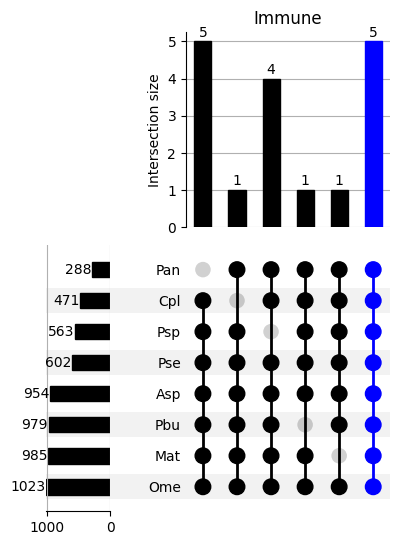

In [32]:
GetCommonMarker(allmarker0_5,'Immune',['Immune'],7)

In [33]:
JoinAllMarkers['counter']['Immune'][JoinAllMarkers['counter']['Immune']['count']>=7].sort_values('count')

,gene,count,type
389,TNIP1,7,Immune
919,CXCR4,7,Immune
733,RUNX3,7,Immune
615,FNBP1,7,Immune
520,COTL1,7,Immune
986,ARPC3,7,Immune
994,VAV1,7,Immune
207,RAC2,7,Immune
188,TLN1,7,Immune
181,FGD3,7,Immune


In [34]:
def getInfo(ct,m):
    t1 = JoinAllMarkers['mapper'][ct].copy()
    t2 = JoinAllMarkers['counter'][ct].copy()
    t1['count'] = t2['count'].to_list()
    return t1[t1['count']>m]


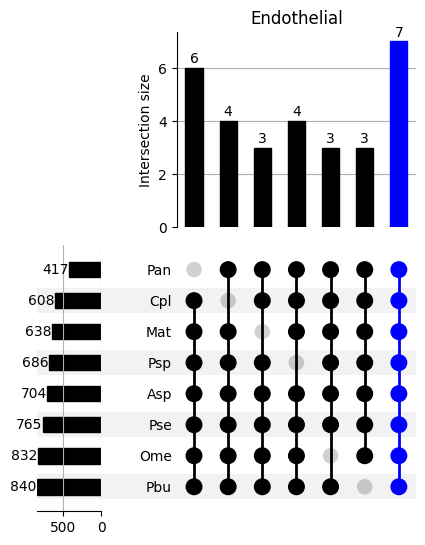

In [35]:
GetCommonMarker(allmarker0_5,'Endothelial',['Endothelial'],7)

In [38]:
JoinAllMarkers['counter']['Endothelial'][JoinAllMarkers['counter']['Endothelial']['count']>=8].sort_values('count')

,gene,count,type
126,SOCS3,8,Endothelial
335,CD81,8,Endothelial
352,ADGRL4,8,Endothelial
466,PLK2,8,Endothelial
474,ERG,8,Endothelial
515,SMAD1,8,Endothelial
718,TFPI2,8,Endothelial


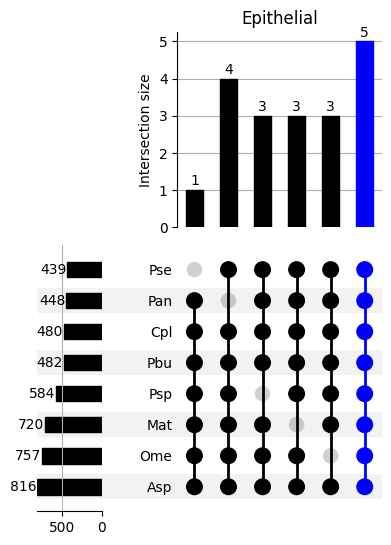

In [39]:
GetCommonMarker(allmarker0_5,'Epithelial',['Epithelial'],7)

In [40]:
JoinAllMarkers['counter']['Epithelial'][JoinAllMarkers['counter']['Epithelial']['count']>=8].sort_values('count')

,gene,count,type
122,ANPEP,8,Epithelial
135,DSP,8,Epithelial
231,MYO15B,8,Epithelial
250,TM4SF4,8,Epithelial
255,SLC15A1,8,Epithelial


In [41]:
JoinAllMarkers['mapper']['Epithelial'].loc['EPCAM']

Ome     True
Mat     True
Pan     True
Pse    False
Psp    False
Cpl    False
Pbu    False
Asp    False
Name: EPCAM, dtype: bool

In [42]:
imm = getInfo('Endothelial',3)
imm

,Ome,Mat,Pan,Pse,Psp,Cpl,Pbu,Asp,count
id,,,,,,,,,
FSTL1,True,False,True,True,False,False,True,True,5
THSD1,True,True,False,True,True,True,False,False,5
FOS,True,True,True,True,True,False,True,True,7
STAB1,True,True,False,False,True,False,False,True,4
EPHB4,True,True,False,True,True,True,False,True,6
...,...,...,...,...,...,...,...,...,...
ANXA1,False,False,False,True,False,True,True,True,4
AEBP1,False,False,False,True,True,False,True,True,4
NR2F2,False,False,False,True,False,True,True,True,4


In [45]:
imm = getInfo('Immune',3)
imm

,Ome,Mat,Pan,Pse,Psp,Cpl,Pbu,Asp,count
id,,,,,,,,,
ARPC1B,True,True,True,True,True,True,True,True,8
TNIP2,True,True,False,True,True,False,False,True,5
ACTB,True,False,True,True,True,False,True,True,6
RPL27A,True,False,False,True,True,True,False,False,4
CMIP,True,True,False,False,False,False,True,True,4
...,...,...,...,...,...,...,...,...,...
SEPT7,False,False,False,True,False,True,True,True,4
RGS3,False,False,False,True,False,True,True,True,4
PLXNC1,False,False,False,True,True,False,True,True,4


In [47]:
tmpsave = pd.concat([JoinAllMarkers['counter']['Epithelial'],JoinAllMarkers['counter']['Endothelial'],JoinAllMarkers['counter']['Immune'],JoinAllMarkers['counter']['Stromal']],ignore_index=True)
tmpsave.to_csv('intestine.lineage.v4.1.cross-species.markers.txt',sep='\t',header=True,index=False)

In [48]:
JoinAllMarkers['counter']['Epithelial'][JoinAllMarkers['counter']['Epithelial']['count']>=8]

,gene,count,type
122,ANPEP,8,Epithelial
135,DSP,8,Epithelial
231,MYO15B,8,Epithelial
250,TM4SF4,8,Epithelial
255,SLC15A1,8,Epithelial


In [49]:
JoinAllMarkers['counter']['Endothelial'][JoinAllMarkers['counter']['Endothelial']['count']>=4]['gene'].to_list()

['FSTL1',
 'THSD1',
 'FOS',
 'STAB1',
 'EPHB4',
 'MMRN2',
 'ARHGAP40',
 'ITM2A',
 'TNS1',
 'AHNAK',
 'EHD2',
 'PODXL',
 'MYCT1',
 'TCIM',
 'MID2',
 'ITM2B',
 'FGD5',
 'NCK1',
 'CYR61',
 'SOCS3',
 'GATA2',
 'ARAP3',
 'LIFR',
 'PTPRB',
 'LHFPL2',
 'PLEKHG4B',
 'APBB2',
 'TMEM204',
 'ELK3',
 'FERMT2',
 'DHRS3',
 'HSPG2',
 'FHL1',
 'CYTH3',
 'RASGEF1B',
 'VGLL4',
 'YAP1',
 'PLS3',
 'SOX8',
 'SHE',
 'TIE1',
 'CAST',
 'SPNS2',
 'MYO1C',
 'CXCL12',
 'KDR',
 'PRX',
 'CLEC11A',
 'AFAP1L1',
 'RHOB',
 'LMO2',
 'APLP2',
 'ZNF521',
 'VWF',
 'TCF4',
 'EDNRA',
 'CD81',
 'CTGF',
 'FZD6',
 'ADGRL4',
 'NFKBIA',
 'PLXND1',
 'PLAT',
 'AKAP12',
 'ABCA1',
 'HHEX',
 'GADD45B',
 'FLI1',
 'TMEM88',
 'ASAP1',
 'ARHGEF9',
 'CH25H',
 'ENG',
 'PALM',
 'KLF6',
 'MEIS2',
 'VAT1',
 'ACER2',
 'TGFBR2',
 'RAC1',
 'PLK2',
 'LDB2',
 'CLIC2',
 'ERG',
 'KANK3',
 'MYL9',
 'SMAD1',
 'CAVIN2',
 'STOM',
 'RHOC',
 'RBMS1',
 'FLOT1',
 'KLHL4',
 'RIPOR1',
 'JAG2',
 'CYFIP1',
 'JUNB',
 'CDH5',
 'PLPP1',
 'PDE2A',
 'FAM43A',
 'SHRO

In [50]:
JoinAllMarkers['counter']['Epithelial'][JoinAllMarkers['counter']['Epithelial']['count']>=4]['gene'].to_list()

['C5ORF15',
 'CMAS',
 'AGR2',
 'CDHR2',
 'NGEF',
 'CIDEC',
 'CLRN3',
 'RNF128',
 'MGST1',
 'NAALADL1',
 'COX1',
 'SLC3A1',
 'HNF4A',
 'GPX1',
 'DBI',
 'PLEC',
 'ITPK1',
 'PRR15L',
 'FABP6',
 'ALDOB',
 'HBEGF',
 'ANPEP',
 'RHPN2',
 'TMC5',
 'MUC13',
 'DSP',
 'FABP1',
 'PHLDA2',
 'JUP',
 'A1CF',
 'DEGS2',
 'PLLP',
 'CRYBG2',
 'CORO2A',
 'RBP2',
 'EPB41L3',
 'CYP4B1',
 'DHRS11',
 'PLD1',
 'CKB',
 'GAPDH',
 'MYO15B',
 'MGAM',
 'TM4SF4',
 'SLC15A1',
 'UGP2',
 'LSR',
 'LMO7',
 'CALML4',
 'SLC7A7',
 'ELOVL1',
 'MPP1',
 'COX2',
 'MGST3',
 'ETHE1',
 'ANXA4',
 'DAO',
 'PLIN2',
 'NET1',
 'CDX1',
 'ANKS4B',
 'SLC1A1',
 'CDX2',
 'ATP1B1',
 'COX3',
 'NHSL1',
 'HNF4G',
 'XPNPEP2',
 'ACSL5',
 'PDZK1',
 'F2RL1',
 'CDH17',
 'ANK3',
 'CLDN15',
 'CD36',
 'TMEM45B',
 'PLSCR1',
 'PLS1',
 'ND1',
 'RBM47',
 'EPS8L3',
 'CREB3L3',
 'FRK',
 'klf5l',
 'ENPEP',
 'EPS8L2',
 'LDLR',
 'GATA6',
 'FABP2',
 'MELTF',
 'ASAH2',
 'FA2H',
 'KRT18',
 'ATP6',
 'MYO1B',
 'IRF6',
 'SERPINB1',
 'SLC13A2',
 'TJP2',
 'SLC5A1',
 'A

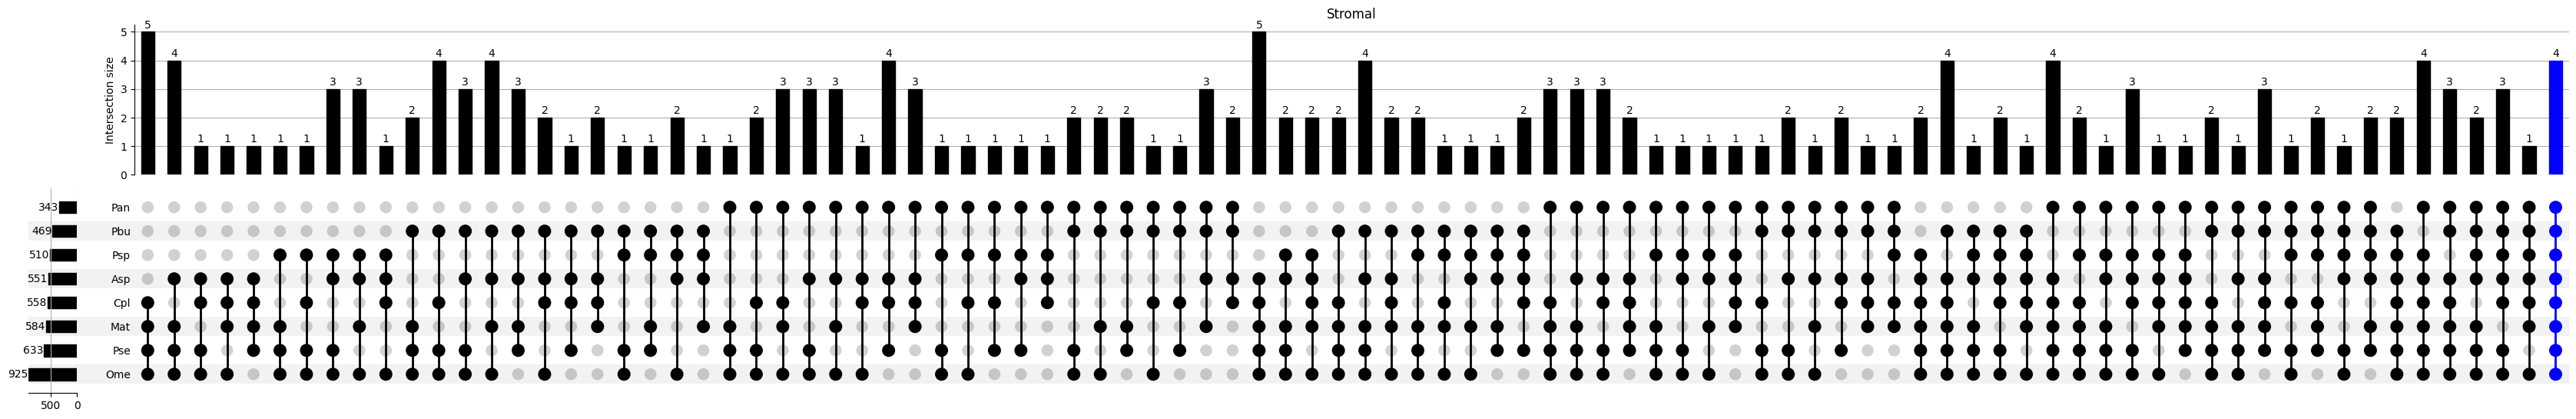

In [51]:
GetCommonMarker(allmarker0_5,'Stromal',['Stromal'],4)

In [52]:
def printMarker(genes='xxx'):
    for x in allmarker0_5:
        print(x)
        tmp = allmarker0_5[x]
        print(tmp[tmp['ZB']==genes])

In [53]:
printMarker('KRT18')

Ome
             p_val  avg_log2FC  pct.1  pct.2     p_val_adj      cluster  \
61    0.000000e+00       2.285  0.783  0.185  0.000000e+00  Endothelial   
4614  1.080000e-62       0.734  0.252  0.195  2.950000e-58   Epithelial   

       gene     ZB  
61    KRT18  KRT18  
4614  KRT18  KRT18  
Mat
      p_val  avg_log2FC  pct.1  pct.2  p_val_adj     cluster   gene     ZB
2371    0.0       3.634   0.92   0.07        0.0  Epithelial  KRT18  KRT18
Psp
      p_val  avg_log2FC  pct.1  pct.2  p_val_adj     cluster   gene     ZB
1988    0.0       1.394  0.695  0.254        0.0  Epithelial  KRT18  KRT18
Pan
Empty DataFrame
Columns: [p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster, gene, ZB]
Index: []
Pse
      p_val  avg_log2FC  pct.1  pct.2  p_val_adj     cluster   gene     ZB
1847    0.0        3.36  0.852  0.113        0.0  Epithelial  KRT18  KRT18
Cpl
      p_val  avg_log2FC  pct.1  pct.2  p_val_adj     cluster   gene     ZB
1909    0.0       2.086  0.915  0.305        0.0  Epithelial  K

In [54]:
GetJointMarkers('Endothelial',8)

['SOCS3', 'CD81', 'ADGRL4', 'PLK2', 'ERG', 'SMAD1', 'TFPI2']

In [55]:
GetJointMarkers('Epithelial',8)

['ANPEP', 'DSP', 'MYO15B', 'TM4SF4', 'SLC15A1']

In [56]:
GetJointMarkers('Immune',8)

['ARPC1B', 'PTPRC', 'ACTR3', 'ARPC2', 'LCP1']

In [57]:
GetJointMarkers('Stromal',8)

['FSTL1', 'AHNAK', 'FN1', 'COL1A1']

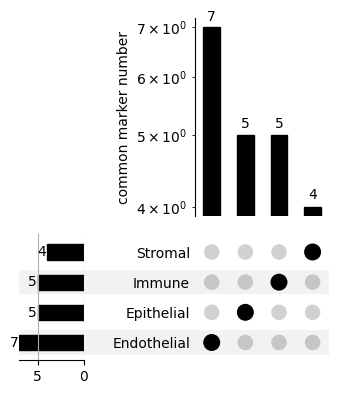

In [58]:
stastic_intersection = {
    'Endothelial' :GetJointMarkers('Endothelial',8),
    'Stromal' :GetJointMarkers('Stromal',8),
    'Epithelial':GetJointMarkers('Epithelial',8),
    'Immune' :GetJointMarkers('Immune',8),
    #'Cycling' :GetJointMarkers('Cycling',4),
}
indicators_df=from_contents(stastic_intersection)
upset=UpSet(indicators_df, sort_by='degree', subset_size='count',  show_counts=True,min_degree=1)
plt_result=upset.plot()
plt_result["intersections"].set_ylabel("common marker number")
plt_result["intersections"].set_yscale('log')
plt.show()

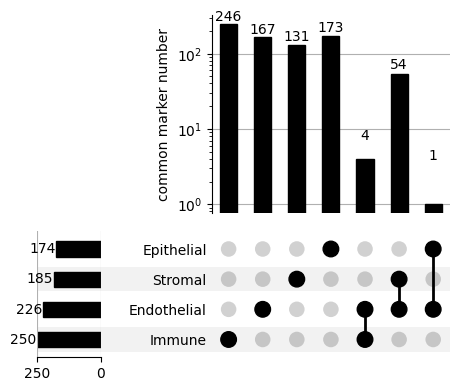

In [59]:
stastic_intersection = {
    'Endothelial' :GetJointMarkers('Endothelial',4),
    'Stromal' :GetJointMarkers('Stromal',4),
    'Epithelial':GetJointMarkers('Epithelial',4),
    'Immune' :GetJointMarkers('Immune',4),
}
indicators_df=from_contents(stastic_intersection)
upset=UpSet(indicators_df, sort_by='degree', subset_size='count',  show_counts=True,min_degree=1)
plt_result=upset.plot()
plt_result["intersections"].set_ylabel("common marker number")
plt_result["intersections"].set_yscale('log')
plt.show()

In [60]:
import numpy as np

genes = indicators_df.reset_index().set_index('id')
genes['num'] = genes.sum(axis=1).to_list()
genes['zebra'] = genes.index
genes

,Endothelial,Stromal,Epithelial,Immune,num,zebra
id,,,,,,
FSTL1,True,True,False,False,2,FSTL1
THSD1,True,False,False,False,1,THSD1
FOS,True,True,False,False,2,FOS
STAB1,True,False,False,False,1,STAB1
EPHB4,True,False,False,False,1,EPHB4
...,...,...,...,...,...,...
WIPF1,False,False,False,True,1,WIPF1
SEPT7,False,False,False,True,1,SEPT7
RGS3,False,False,False,True,1,RGS3
